In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
#import tensorflow_addons as tfa
#print(tfa.__version__)
import pickle
#import random
#from sklearn.metrics import f1_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report as cr
#import seaborn as sns

In [2]:
inetHopkinsD256 =  pd.DataFrame()
for i in range(1,3):
    path = '../resources/PC2022/d=256/hopkins_PC2022_256d_{}.csv'
    dataFrame = pd.read_csv(path.format(i))
    inetHopkinsD256 = pd.concat([inetHopkinsD256, dataFrame], ignore_index=True)
    #= inetHopkinsD2.append(dataFrame, ignore_index=True)
         
averages = inetHopkinsD256.loc[:, 'avg']
std = inetHopkinsD256.loc[:, 'std']
ids = inetHopkinsD256.loc[:, 'id']

m = averages[np.argmax(averages)]
print(m)
mmin = averages[np.argmin(averages)]
print(mmin)
  
inetHopkinsD256 = inetHopkinsD256.dropna()
inetHopkinsD256

1.0
0.0


,id,avg,std
0,10003327,0.921783,0.263923
1,10008016,0.999582,0.004175
2,10009770,0.790000,0.409360
3,10010617,1.000000,0.000000
4,10012036,1.000000,0.000000
...,...,...,...
68648,9970254,1.000000,0.000000
68649,9970373,1.000000,0.000000
68650,9973032,1.000000,0.000000
68651,9990896,0.480000,0.502117


In [3]:
filteredHopkinsD256 = inetHopkinsD256[inetHopkinsD256['avg'] >= 0.7] 
filteredHopkinsD256

,id,avg,std
0,10003327,0.921783,0.263923
1,10008016,0.999582,0.004175
2,10009770,0.790000,0.409360
3,10010617,1.000000,0.000000
4,10012036,1.000000,0.000000
...,...,...,...
68647,9968008,1.000000,0.000000
68648,9970254,1.000000,0.000000
68649,9970373,1.000000,0.000000
68650,9973032,1.000000,0.000000


In [5]:
m-mmin

1.0

In [35]:
lenght

0.045221507320855066

Text(0.5, 1.0, 'Frequência de Classes x AVG Hopkins Statistics (100 runs) with D=256 PC2022 Embeddings')

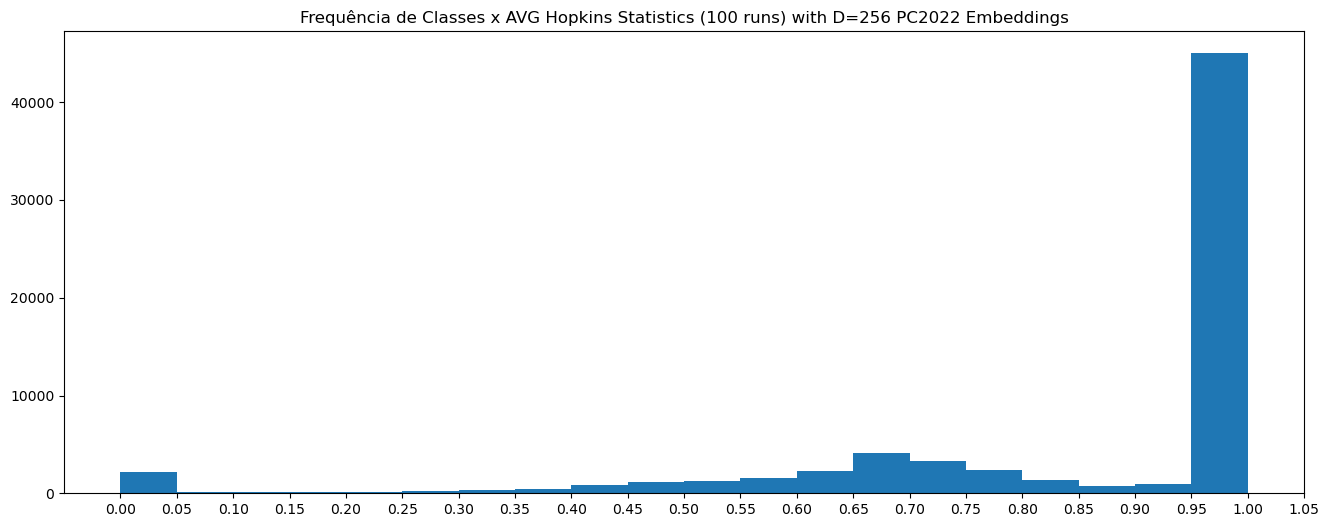

In [4]:
N_points = len(averages)
n_bins = 20
lenght = (m - mmin)/n_bins
fig, axs = plt.subplots(figsize=(16,6))

#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
plt.xticks(np.arange(0, 1.25, 0.05))
axs.hist(averages, bins=n_bins)

plt.title('Frequência de Classes x AVG Hopkins Statistics (100 runs) with D=256 PC2022 Embeddings')
#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)

In [ ]:
# to-do: review: 
# Frequency vs density histograms!!

In [8]:
with open('../resources/class_dictionary.pkl', 'rb') as f:
    data = pickle.load(f)


In [9]:
train_images = pd.read_csv('../resources/train_images.csv')
validation_images = pd.read_csv('../resources/validation_images.csv')

In [10]:
train_image_list = train_images['image_paths']
validation_image_list = validation_images['image_paths']

In [11]:
images_by_class = {}
for c in train_image_list:
  split = c.split('/')
  c_id = split[0]
  img = split[1]
  try:
    images_by_class[c_id]
  except Exception:
    images_by_class[c_id] = []
  finally:
    images_by_class[c_id].append(img)
    
for c in validation_image_list:
  split = c.split('/')
  c_id = split[0]
  img = split[1]
  try:
    images_by_class[c_id]
  except Exception:
    images_by_class[c_id] = []
  finally:
    images_by_class[c_id].append(img)
  

In [12]:
# Sanity Check
dataset_classlist = list(data.keys())
l = 0
for i in dataset_classlist:
  l += len(images_by_class[str(i)])
l

2885052

In [20]:
filteredHopkinsD256

NameError: name 'filteredHopkinsD256' is not defined

In [13]:
indexes = filteredHopkinsD256['id']
img_quantities = []
for index in indexes:
  img_quantities.append(len(images_by_class[str(index)]))
hop = filteredHopkinsD256['avg']


In [11]:
filteredHopkinsD256_dataframe['img_quantities']

NameError: name 'filteredHopkinsD256_dataframe' is not defined

In [14]:
filteredHopkinsD256_dataframe = pd.DataFrame({'ids': indexes, 'img_quantities': img_quantities, 'hopkins': hop})
filteredHopkinsD256_dataframe = filteredHopkinsD256_dataframe.reset_index(drop=True)
filteredHopkinsD256_dataframe

,ids,img_quantities,hopkins
0,10003327,15,0.921783
1,10008016,14,0.999582
2,10009770,4,0.790000
3,10010617,101,1.000000
4,10012036,99,1.000000
...,...,...,...
54069,9968008,90,1.000000
54070,9970254,101,1.000000
54071,9970373,50,1.000000
54072,9973032,56,1.000000


In [15]:
filteredHopkinsD256_dataframe = filteredHopkinsD256_dataframe[filteredHopkinsD256_dataframe['img_quantities'] >= 10] 
filteredHopkinsD256_dataframe

,ids,img_quantities,hopkins
0,10003327,15,0.921783
1,10008016,14,0.999582
3,10010617,101,1.000000
4,10012036,99,1.000000
5,10027741,73,1.000000
...,...,...,...
54069,9968008,90,1.000000
54070,9970254,101,1.000000
54071,9970373,50,1.000000
54072,9973032,56,1.000000


In [16]:
filteredHopkinsD256_dataframe.to_csv('PC2022_256D_embeddings_clusterable_classes.csv')

In [53]:
filteredHopkinsD2_dataframe['ids'][0]

10010617

In [73]:
N_points

31403

In [77]:
lenght

12.333333333333334

151
3


Text(0.5, 1.0, 'Frequência de Classes Particionáveis (Hopkins D=2) Vs Qtd. Imagens')

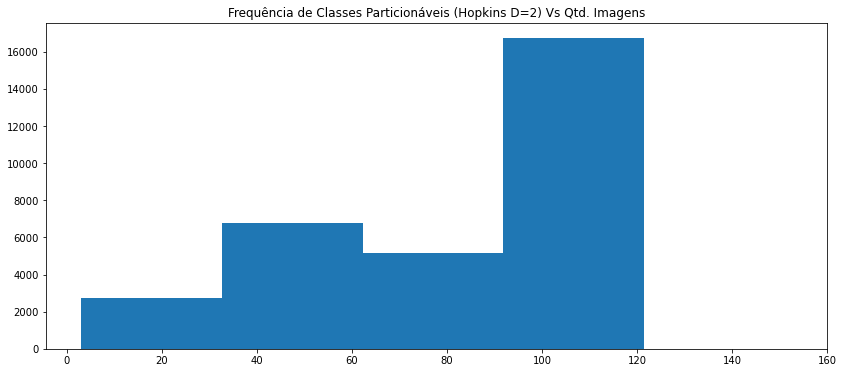

In [39]:
mmax = filteredHopkinsD2_dataframe['img_quantities'][np.argmax(filteredHopkinsD2_dataframe['img_quantities'])]
print(mmax)
mmin = filteredHopkinsD2_dataframe['img_quantities'][np.argmin(filteredHopkinsD2_dataframe['img_quantities'])]
print(mmin)

N_points = len(filteredHopkinsD2_dataframe['ids'])
n_bins = 5
lenght = (mmax - mmin)/n_bins
fig, axs = plt.subplots(figsize=(14,6))

#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
#plt.xticks(np.arange(3, 160, int(lenght)))
axs.hist(filteredHopkinsD2_dataframe['img_quantities'], bins=n_bins)
plt.xlim(right=160)
plt.title('Frequência de Classes Particionáveis (Hopkins D=2) Vs Qtd. Imagens')

#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)